This notebook show how to open the .h5 files that contain instrument data (waveforms) and metadata for each event.

In [1]:
import h5py
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls 

1                            mixed.hdf5
2                            mixed_info.npy
basic_SVM_using_info.ipynb   mixed_trace.npy
creating_datasets.ipynb      Multi Layer Perceptron.ipynb
earthquake_sample_events.h5  playing_with_data.ipynb
events_on_map.ipynb          plot-events.ipynb
explosion_sample_events.h5   TimeseriesAI/
fastai2/                     train_test_mixed/
feature_extraction.ipynb     using-obspy.ipynb
InceptionTime/


Each file contains two HDF5 datasets, which are accessed by name:
 - 'event_info', an array of JSON strings, where element has info about the location, type, etc of the event
 - 'traces', an array of numpy arrays, of shape (num events, num waveforms, waveform length) 

In [3]:
with h5py.File('earthquake_sample_events.h5', 'r') as fin:
    event_info_dataset = fin.get('event_info')
    trace_dataset = fin.get('traces')
    
    # Convert to numpy arrays
    eq_event_info = np.array(event_info_dataset)
    eq_trace_data = np.array(trace_dataset)

print(f'Loaded {eq_event_info.shape[0]} earthquake events')

SyntaxError: invalid syntax (<ipython-input-3-91ce3acc2ce2>, line 9)

'event_info' contains JSON strings, which can be imported as python dicts. Let's look at the first one:

In [3]:
event_info_dict = json.loads(eq_event_info[0])
print(json.dumps(event_info_dict, indent=2))

{
  "resource_id": "smi:local/5618a40f-8a92-40b1-93e8-3f99ba83f3f0",
  "event_type": "earthquake",
  "event_type_certainty": "known",
  "picks": [
    {
      "resource_id": "smi:local/618f3c22-131c-496e-9ff4-352cf9f97b15",
      "time": "2019-01-08T17:15:20.610000Z",
      "waveform_id": {
        "station_code": "KIF",
        "channel_code": "HHZ"
      },
      "horizontal_slowness": -1.0,
      "horizontal_slowness_errors": {
        "uncertainty": -1.0
      },
      "backazimuth": -1.0,
      "backazimuth_errors": {
        "uncertainty": -1.0
      },
      "phase_hint": "Lg"
    },
    {
      "resource_id": "smi:local/708ac890-f7b2-4151-adcb-d2e86fd686da",
      "time": "2019-01-08T17:14:59.240000Z",
      "waveform_id": {
        "station_code": "KIF",
        "channel_code": "HHZ"
      },
      "horizontal_slowness": -1.0,
      "horizontal_slowness_errors": {
        "uncertainty": -1.0
      },
      "backazimuth": -1.0,
      "backazimuth_errors": {
        "uncertainty

There is a lot of info here, but the important fields are

In [4]:
print('Event type: {} {}'.format(event_info_dict['event_type_certainty'], event_info_dict['event_type']))
print('Event time and location: {}, {}N {}E'.format(
    event_info_dict['origins'][0]['time'],
    event_info_dict['origins'][0]['latitude'],
    event_info_dict['origins'][0]['longitude'],
))


Event type: known earthquake
Event time and location: 2019-01-08T17:14:30.717560Z, 70.114655N 17.434093E


We can now plot the traces (waveforms) of this event

In [5]:
traces = eq_trace_data[0]
print('{} traces, {} time points per trace'.format(traces.shape[0], traces.shape[1]))

3 traces, 4801 time points per trace


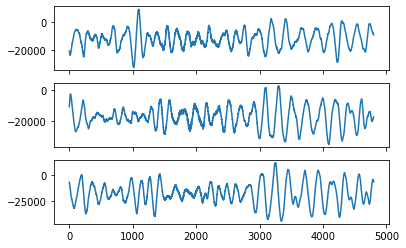

In [6]:
# make a simple plot
fig, axs = plt.subplots(3, 1, sharex=True)
xvals = list(range(len(traces[0])))
for i in range(3):
    axs[i].plot(xvals, traces[i])

The events data looks a bit useless, but this is because we are looking at raw, unfiltered data. The _Obspy_ library has a lot of useful routines for signal processing, shown in the 'using-obspy' notebook 

In [7]:
# Same but for explosions
with h5py.File('explosion_sample_events.h5', 'r') as fin:
    event_info_dataset = fin.get('event_info')
    trace_dataset = fin.get('traces')
    
    ex_event_info = np.array(event_info_dataset)
    ex_trace_data = np.array(trace_dataset)

print(f'Loaded {ex_event_info.shape[0]} explosion events')

Loaded 198 explosion events


For explosion events, there is typically extra info listed as 'comments', containing the name of the mine where the explosion took place.

In [8]:
event_info_dict = json.loads(ex_event_info[0])

print('Event type: {} {}'.format(event_info_dict['event_type_certainty'], event_info_dict['event_type']))
for comment in event_info_dict['comments']:
    print(comment['text'])


Event type: known explosion
FULLY AUTOMATIC, EVENT TYPE & LOCATION & MAGNITUDE CHECKED (LEV)
MINING AREA: KEVITSA  3KM
